<a href="https://colab.research.google.com/github/emirabiyyu/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 100


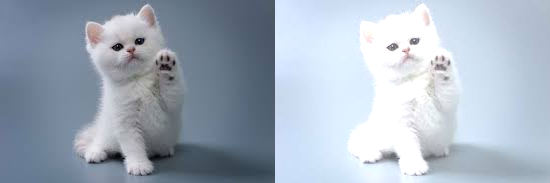

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv2.imread('/content/drive/MyDrive/PCVK/download.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv2.hconcat((original, brightness_image))
cv2_imshow(final_frame)

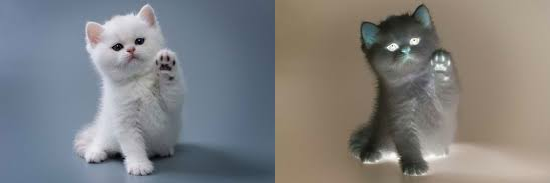

In [4]:
inverse_image = 255 - original
final_frame = cv2.hconcat([original, inverse_image])
cv2_imshow(final_frame)

 Mengubah tingkat kontrast citra 
--------------------------------
Masukkan nilai kontras: 40


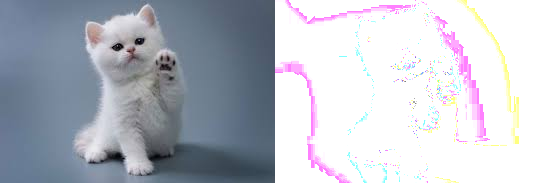

In [5]:
print(' Mengubah tingkat kontrast citra ')
print('--------------------------------')
try:
  alpha = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')
  exit()

contrast_image = np.clip(alpha * (original - 128) + 128, 0, 255).astype(np.uint8)
final_frame = cv2.hconcat([original, contrast_image])
cv2_imshow(final_frame)

 Mengubah tingkat kontrast citra 
--------------------------------
Masukkan nilai kontras: 4


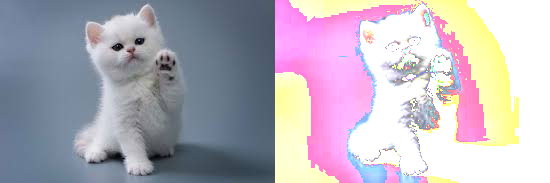

In [6]:
print(' Mengubah tingkat kontrast citra ')
print('--------------------------------')
try:
  alpha = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')
  exit()

contrast_image = np.clip(alpha * (original - 128) + 128, 0, 255).astype(np.uint8)
final_frame = cv2.hconcat([original, contrast_image])
cv2_imshow(final_frame)

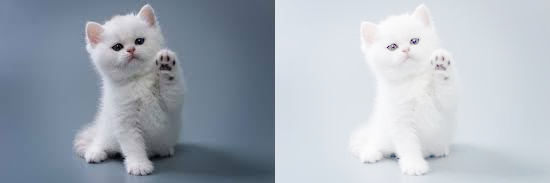

In [7]:
# Parameters for logarithmic brightness adjustment
c = 255 / np.log(1 + np.max(original))

log_image = c * np.log1p(original)

log_image = np.clip(log_image, 0, 255).astype(np.uint8)
final_frame = cv2.hconcat([original, log_image])
cv2_imshow(final_frame)


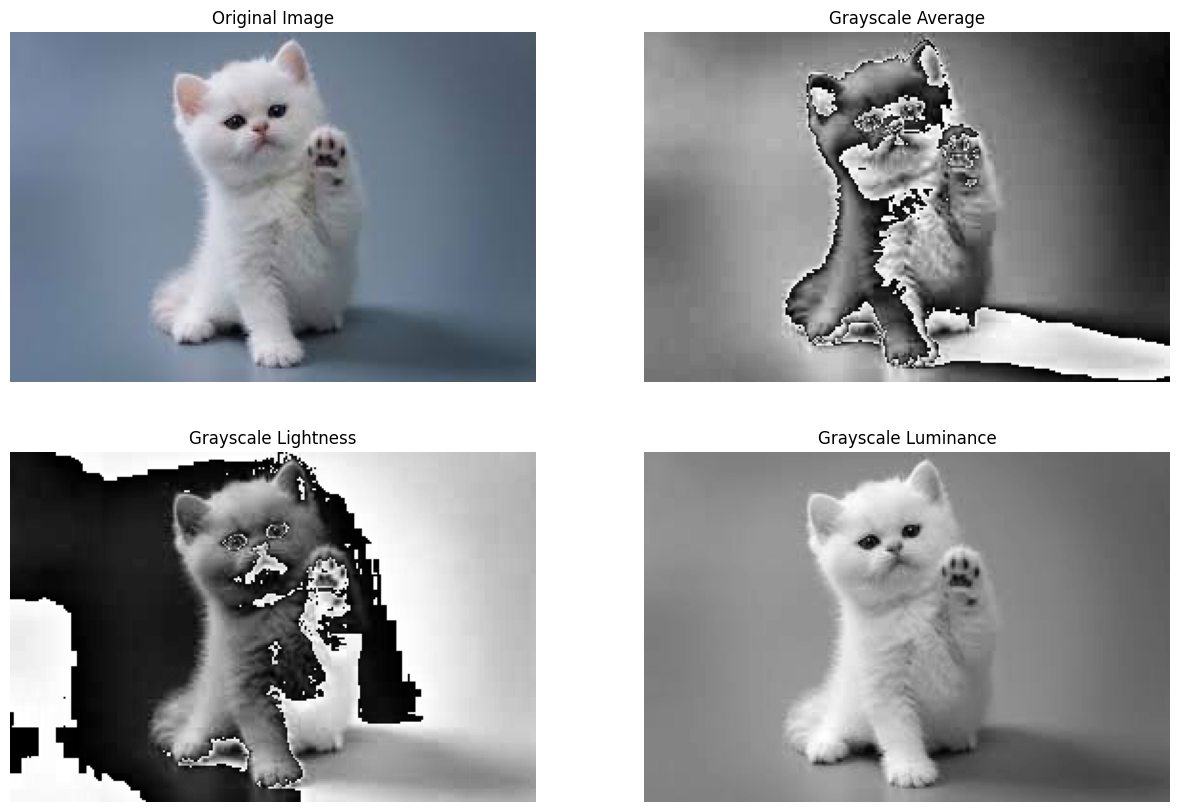

In [8]:
# Separate the channels
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
R, G, B = original[:,:,0], original[:,:,1], original[:,:,2]

grayscale_avg = (R + G + B) / 3

grayscale_lightness = (np.max(original, axis=2) + np.min(original, axis=2)) / 2

grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B

import matplotlib.pyplot as plt

# Display the original and grayscale images
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(original)
plt.axis('off')

# Grayscale Average
plt.subplot(2, 2, 2)
plt.title('Grayscale Average')
plt.imshow(grayscale_avg, cmap='gray')
plt.axis('off')

# Grayscale Lightness
plt.subplot(2, 2, 3)
plt.title('Grayscale Lightness')
plt.imshow(grayscale_lightness, cmap='gray')
plt.axis('off')

# Grayscale Luminance
plt.subplot(2, 2, 4)
plt.title('Grayscale Luminance')
plt.imshow(grayscale_luminance, cmap='gray')
plt.axis('off')

plt.show()

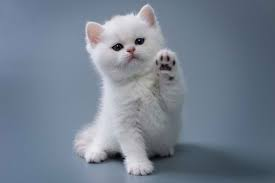

In [9]:
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
cv2_imshow(original)

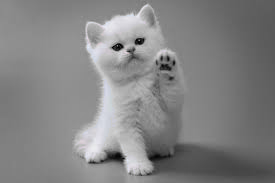

In [10]:
# Define color range for color (RGB format)
lower_bound = np.array([0, 100, 200], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask for the blue color range
color_mask = cv2.inRange(original, lower_bound, upper_bound)

# gray image
gray_image = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

image = np.zeros_like(original)
image[color_mask != 0] = original[color_mask != 0]
image[color_mask == 0] = gray_image[color_mask == 0]

cv2_imshow(image)
